In [1]:
include("../../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using Plots
using DifferentialEquations
using .JuliaMBD
using .JuliaMBD.Diagram

In [4]:
@model pitch_rate begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0
        I_ENG2Rr_ENG_mount = -0.4
        i_center_ENG = 100
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "pitch_rate")
end


pitch_rate (generic function with 1 method)

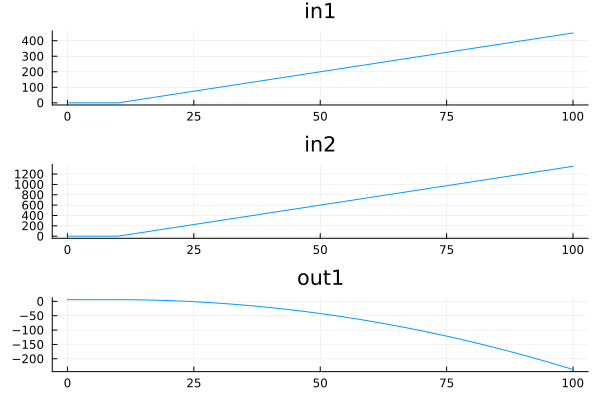

In [5]:
@model Test_pitch_rate begin
    @block begin
        p = pitch_rate()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
    end
end

m = @compile Test_pitch_rate()
res = simulate(m, tspan=[0, 100])
plot(res)

In [4]:
@model v_z_carbody begin
    @parameter begin
        M_ENG = 50
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "v_z_carbody")
end

v_z_carbody (generic function with 1 method)

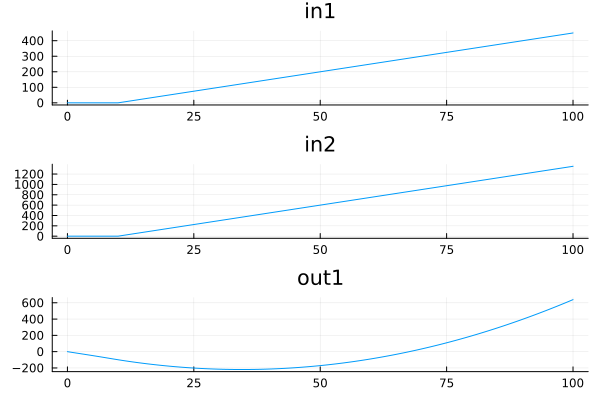

In [5]:
@model Test_v_z_carbody begin
    @block begin
        p = v_z_carbody()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
    end
end

m = @compile Test_v_z_carbody()
res = simulate(m, tspan=[0, 100])
plot(res)

In [6]:
@model z_velocity begin
    @parameter begin
        I_ENG2Fr_ENG_mount = 0
        I_ENG2Rr_ENG_mount = -0.4
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "z_velocity")
end

z_velocity (generic function with 1 method)

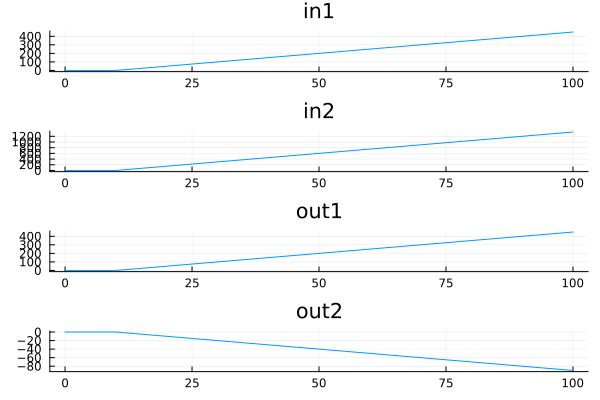

In [7]:
@model Test_z_velocity begin
    @block begin
        p = z_velocity()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1
        p.out2 => out2
    end
end

m = @compile Test_z_velocity()
res = simulate(m, tspan=[0, 100])
plot(res)


In [9]:
@model HM_F_PNT begin
    @xmlmodel("METI_Vertical_Vibration.drawio", "ENG_PNT")
end

HM_F_PNT (generic function with 1 method)

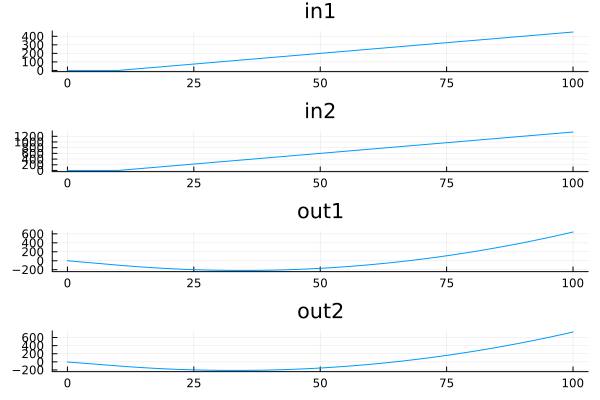

In [11]:
@model TestHM_F_PNT begin
    @block begin
        m = HM_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => m.in1
        ramp2.out => m.in2
    end
    @scope begin
        m.in1 => in1
        m.in2 => in2
        m.out1 => out1
        m.out2 => out2
    end
end

m = @compile TestHM_F_PNT()
res = simulate(m, tspan=[0, 100])
plot(res)

In [45]:
@model HM_BD_F_PNT begin
    @parameter begin
        M_Fr_body = 44.01
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_BD_F_PNT")
end

HM_BD_F_PNT (generic function with 1 method)

In [16]:
@model HM_HD_F_PNT begin
    @parameter begin
        M_Fr_head = 27.6
        r_Fr_head = 0.21857
        theta_Fr_head = 1.3251
        k_Fr_head = 1210
        d_Fr_head = 8.17
        I_Fr_head = 1.8
        x_k_Fr_head_ini = -0.011885
        g = 9.8
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "HM_HD_F_PNT")
end

HM_HD_F_PNT (generic function with 1 method)

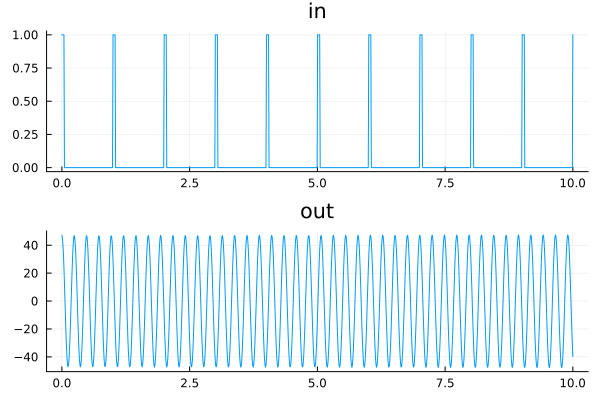

In [18]:
@model TestHM_HD_F_PNT begin
    @block begin
        m = HM_HD_F_PNT()
        s1 = PulseGenerator(period=1, out = OutPort(:pulse))
    end
    @connect begin
        s1.out => m.in1
    end
    @scope begin
        m.in1 => in
        m.out1 => out
    end
end

m = @compile_derivative TestHM_HD_F_PNT()
res = simulate(m, tspan=[0, 10])
plot(res)

In [6]:
b = TestHM_HD_F_PNT()
JuliaMBD.connecttag(b.blocks)
bs = JuliaMBD.tsort(JuliaMBD.allcomponents(b))

127-element Vector{Main.JuliaMBD.AbstractComponent}:
 "Parameter(##699)"
 "Parameter(##636)"
 "Parameter(##629)"
 "Parameter(##586)"
 "Parameter(##628)"
 "Parameter(##651)"
 "Block(Constant)"
 "OutPort(##650)"
 "OutPort(##626)"
 "InPort(##630)"
 ⋮
 "InPort(##655)"
 "Block(Gain)"
 "OutPort(##656)"
 "InPort(##658)"
 "Block(Outport)"
 "OutPort(##659)"
 "InPort(##625)"
 "Block(Integrator)"
 "OutPort(##627)"

In [12]:
b.stateinports

2-element Vector{Main.JuliaMBD.AbstractPort}:
 "OutPort(##626)"
 "OutPort(##631)"

In [14]:
ex = JuliaMBD.expr_ifunc_derivative(b, bs)
println(ex)
eval(ex)

begin
    function TestHM_HD_F_PNT_ifunc_derivative(; time = 0, var"##626" = 0, var"##631" = 0, var"##592" = 0)
        var"##699" = 1
        var"##636" = -0.011885
        var"##629" = (nothing, nothing)
        var"##586" = 27.6
        var"##628" = 0
        var"##651" = 27.6
        var"##650" = var"##651"
        begin
            var"##689" = var"##650"
        end
        begin
            var"##681" = var"##626"
        end
        var"##630" = var"##681"
        var"##635" = var"##636"
        var"##645" = var"##689"
        begin
            var"##702" = time
        end
        var"##697" = var"##702"
        begin
            var"##682" = var"##635"
        end
        var"##633" = var"##682"
        var"##588" = 0.21857
        var"##587" = var"##588"
        begin
            var"##667" = var"##587"
        end
        var"##595" = var"##667"
        begin
            var"##664" = var"##592"
        end
        ()
        var"##590" = 1.3251
        var"##701" = 0.0
    

var"##595" * var"##596"
        begin
            var"##668" = var"##597"
        end
        var"##599" = var"##668"
        var"##600" = var"##598" * var"##599"
        begin
            var"##673" = var"##600"
        end
        var"##607" = var"##673"
        var"##606" = ((0 - var"##607") - var"##608") - var"##609"
        begin
            var"##678" = var"##606"
        end
        var"##620" = var"##678"
        var"##622" = var"##620" / var"##621"
        begin
            var"##680" = var"##622"
            var"##691" = var"##622"
        end
        var"##643" = var"##691"
        var"##644" = var"##642" * var"##643"
        begin
            var"##687" = var"##644"
        end
        var"##640" = var"##687"
        var"##641" = var"##639" * var"##640"
        begin
            var"##693" = var"##641"
        end
        var"##654" = var"##693"
        var"##652" = (0 + var"##653") + var"##654"
        begin
            var"##694" = var"##652"
        end
        var"##655

TestHM_HD_F_PNT_ifunc (generic function with 1 method)

In [15]:
TestHM_HD_F_PNT_ifunc()

UndefVarError: UndefVarError: ##603 not defined

In [9]:
ex = JuliaMBD.expr_sfunc_derivative(b, bs)
println(ex)
eval(ex)

begin
    function TestHM_HD_F_PNT_sfunc_derivative(var"##626", var"##631", var"##592"; time = 0)
        var"##699" = 1
        var"##636" = -0.011885
        var"##629" = (nothing, nothing)
        var"##586" = 27.6
        var"##628" = 0
        var"##651" = 27.6
        var"##650" = var"##651"
        begin
            var"##689" = var"##650"
        end
        begin
            var"##681" = var"##626"
        end
        var"##630" = var"##681"
        var"##635" = var"##636"
        var"##645" = var"##689"
        begin
            var"##702" = time
        end
        var"##697" = var"##702"
        begin
            var"##682" = var"##635"
        end
        var"##633" = var"##682"
        var"##588" = 0.21857
        var"##587" = var"##588"
        begin
            var"##667" = var"##587"
        end
        var"##595" = var"##667"
        begin
            var"##664" = var"##592"
        end
        ()
        var"##590" = 1.3251
        var"##701" = 0.0
        var"##611"

TestHM_HD_F_PNT_sfunc (generic function with 1 method)

In [21]:
bs[1].outs[1].dest.parent

"Block(Product)"

In [25]:
b.dstateinports

Main.JuliaMBD.AbstractPort[]